In [36]:
#Libraries and Functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [37]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [38]:
#Load the Iris dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
df.describe() #Different functions and data on the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
df.info() #informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#Count the number of values per class
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [42]:
#Preprocessing the dataset
##check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

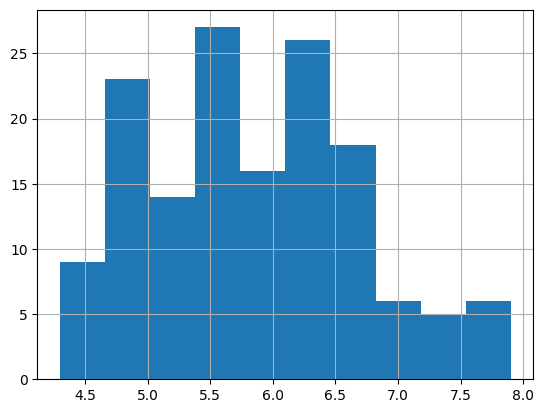

In [43]:
#Exploratory Data Analysis
##Histograms as a function of data set variables
df['sepal_length'].hist()

<Axes: >

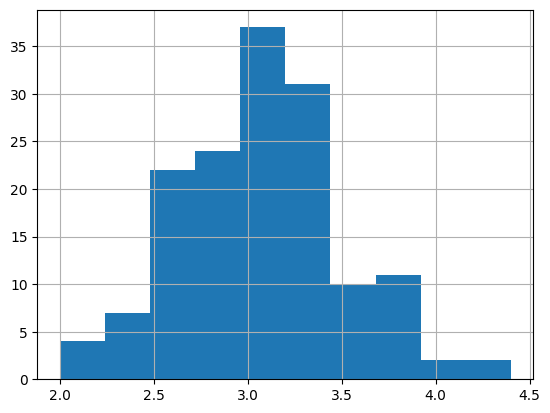

In [44]:
df['sepal_width'].hist()

<Axes: >

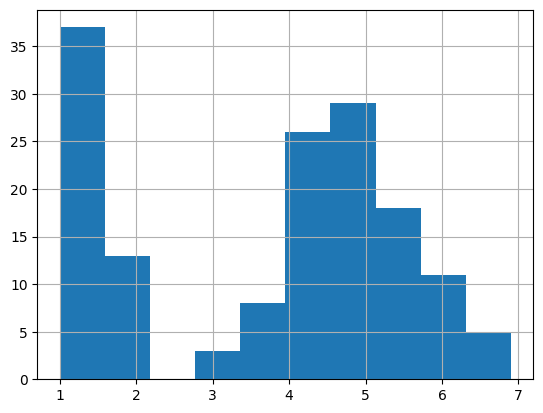

In [45]:
df['petal_length'].hist()

<Axes: >

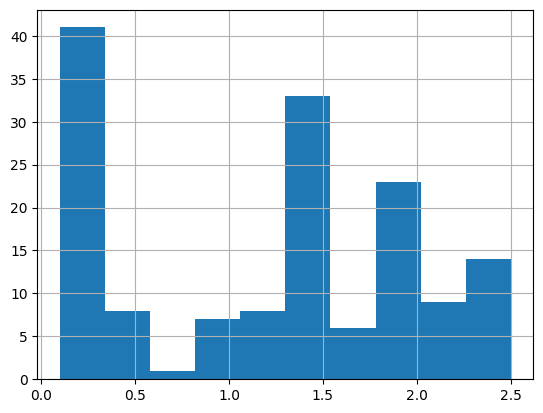

In [46]:
df['petal_width'].hist()

In [47]:
#scatterplot
##For each species --> 1 color
colors = ['lightgreen', 'lightblue', 'red']
species = ['setosa', 'versicolor', 'virginica'] 

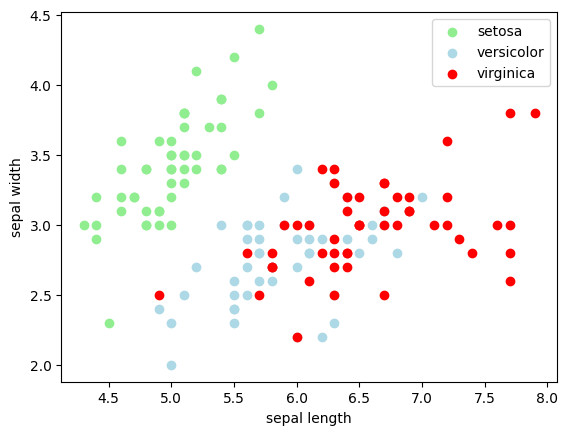

In [48]:
#Sepal length vs Sepal width
##Distribution by number and size
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label = species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

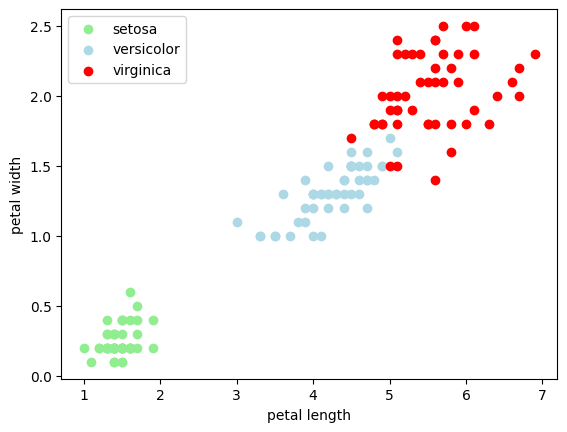

In [49]:
#Similar scatterplots for other feature combinations
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

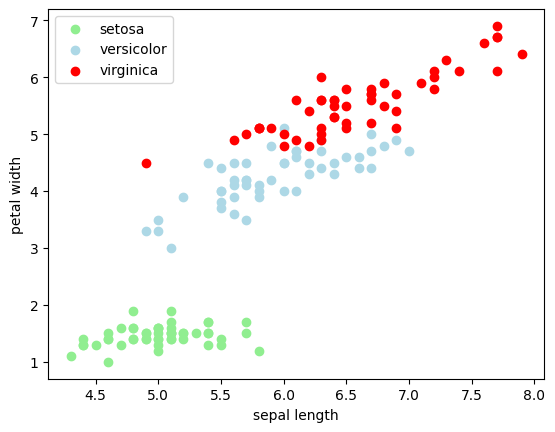

In [50]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label = species[i])
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend()

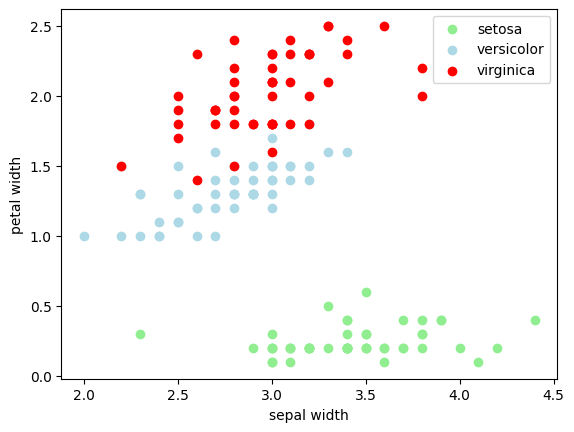

In [51]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [52]:
#Create one-hot columns for each unique value in the 'species' column
## 1 specie --> 3 under-species (setosa, versicolor, virginica)
df = pd.get_dummies(df, columns=['species'], prefix='species')

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [54]:
#Boolean values are transformed into integers for simpler use in the model  
df['species_setosa'] = df['species_setosa'].astype(int)
df['species_versicolor'] = df['species_versicolor'].astype(int)
df['species_virginica'] = df['species_virginica'].astype(int)

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [56]:
#Correlation Matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
species_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
species_versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
species_virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


<Axes: >

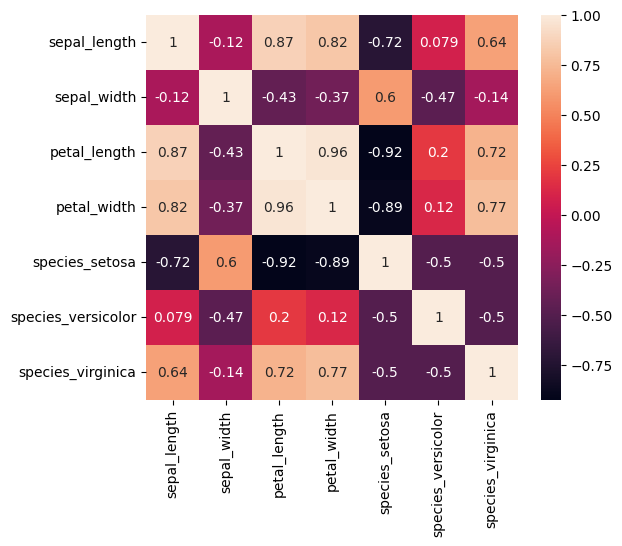

In [57]:
corr = df.corr()
#Create a subplot with a specified size
fig, ax = plt.subplots(figsize=(6,5))
#Generate a heatmap to visualize the correlation matrix
#'annot=True' displays the correlation values on the heatmap
sns.heatmap(corr, annot = True, ax=ax)

In [58]:
#Model Training 

from sklearn.model_selection import train_test_split
#The logistic regression, svm and random forest models are all equivalent.
#Having already used the others in the titanic data set, I opted for logistic regression. 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [59]:
#Loading the iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species_setosa'] = iris.target == 0  # 1 if setosa, or 0
data['species_versicolor'] = iris.target == 1  # 1 if versicolor, or 0
data['species_virginica'] = iris.target == 2  # 1 if virginica, or 0

In [60]:
#Separation of features (X) and labels (Y)
X = data.drop(['species_setosa', 'species_versicolor', 'species_virginica'], axis=1)
Y = data[['species_setosa', 'species_versicolor', 'species_virginica']]

In [61]:
#Division of data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [62]:
#Logistic Regression Model Creation and Training with Hyperparameters
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [63]:
#Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_model = GridSearchCV(model, param_grid, cv=5)
grid_model.fit(x_train, y_train.values.argmax(axis=1))

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [64]:
#Show hyperparameters
print("Best Hyperparameters:", grid_model.best_params_)

Best Hyperparameters: {'C': 1}


In [65]:
#Creation and training of the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train.values.argmax(axis=1))

LogisticRegression(multi_class='multinomial')

In [66]:
#Predictions on the test set
y_pred_proba = model.predict_proba(x_test)

#Convert probabilities into predicted classes (take the class with the highest probability)
y_pred = y_pred_proba.argmax(axis=1)

#Convert class labels to integers
y_true = y_test.values.argmax(axis=1)

In [67]:
#Model Evaluation
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Axes: >

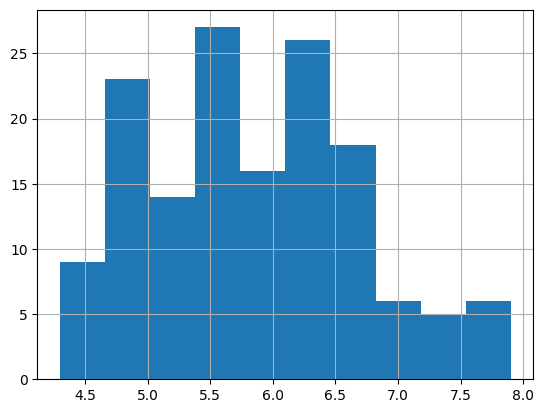

In [68]:
df['sepal_length'].hist()

<Axes: >

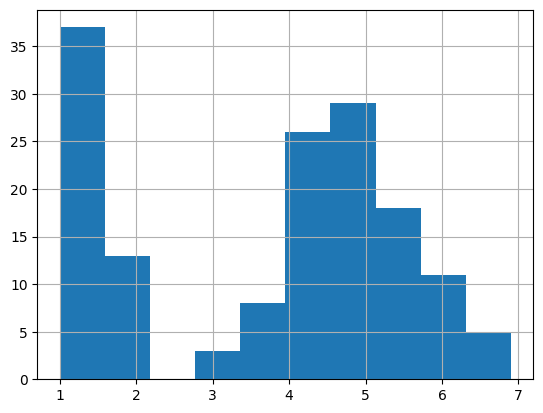

In [69]:
df['petal_length'].hist()